<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/18RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LSTM을 이용한 로이터 뉴스 카테고리 분류

In [2]:
# 로이터 뉴스 데이터는 총 1만 1228개, 46개의 카테고리
# 순환 신경망 Recurrent Neural Network(RNN)
from tensorflow.keras.datasets import reuters

In [3]:
# 학습셋 테스트셋 나누기
# num_words=1000 이거는 빈도가 1 ~ 1000에 해당하는 단어만 선택해서 불러옴
(xtrain, ytrain), (xtest, ytest) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
# 데이터 확인 후 출력
category = np.max(ytrain) + 1
print(category, '카테고리')
print(len(xtrain), '학습용 뉴스 기사')
print(len(xtest), '테스트용 뉴스 기사')
print(xtrain[0])    # 이걸로 토큰화 작업을 마친걸 알수 있음

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# sequence()함수로 길이를 맞춰줌
from tensorflow.keras.preprocessing import sequence

# maxlen=100은 단어 수를 100개로 맞춤
xtrain = sequence.pad_sequences(xtrain, maxlen=100)
xtest = sequence.pad_sequences(xtest, maxlen=100)

In [6]:
# 원핫 인코딩
from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [7]:
# 모델 생성 및 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
# Embedding(총 단어 수, 기사당 단어 수)
model.add(Embedding(1000, 100))             # 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알 수 있는 형태로 변환
# LSTM(기사당 단어수, 기타 옵션), LSTM은 tanh을 활성화 함수로 주로 사용
model.add(LSTM(100, activation='tanh'))     # RNN에서 기억 값에 대한 가중치 제어
model.add(Dense(46, activation='softmax'))

In [8]:
# 모델 실행 옵션
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)

In [10]:
# 모델 실행
history = model.fit(xtrain, ytrain, batch_size = 20, epochs=200, validation_data = (xtest, ytest), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 36s 71ms/step - loss: 2.2070 - accuracy: 0.4441 - val_loss: 1.9303 - val_accuracy: 0.4996
Epoch 2/200
450/450 [==============================] - 7s 15ms/step - loss: 1.7708 - accuracy: 0.5390 - val_loss: 1.6838 - val_accuracy: 0.5739
Epoch 3/200
450/450 [==============================] - 6s 14ms/step - loss: 1.6021 - accuracy: 0.5951 - val_loss: 1.5836 - val_accuracy: 0.6055
Epoch 4/200
450/450 [==============================] - 5s 11ms/step - loss: 1.4084 - accuracy: 0.6542 - val_loss: 1.4175 - val_accuracy: 0.6376
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2552 - accuracy: 0.6879 - val_loss: 1.3143 - val_accuracy: 0.6683
Epoch 6/200
450/450 [==============================] - 5s 10ms/step - loss: 1.1283 - accuracy: 0.7157 - val_loss: 1.2604 - val_accuracy: 0.6768
Epoch 7/200
450/450 [==============================] - 4s 10ms/step - loss: 1.0292 - accuracy: 0.7387 - val_loss: 1.2006 - val_accuracy:

In [11]:
# 테스트 정확도 출력
print('\n Test Accuracy : %.4f' %(model.evaluate(xtest, ytest)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2559 - accuracy: 0.7137

 Test Accuracy : 0.7137


In [13]:
# 학습셋과 테스트셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

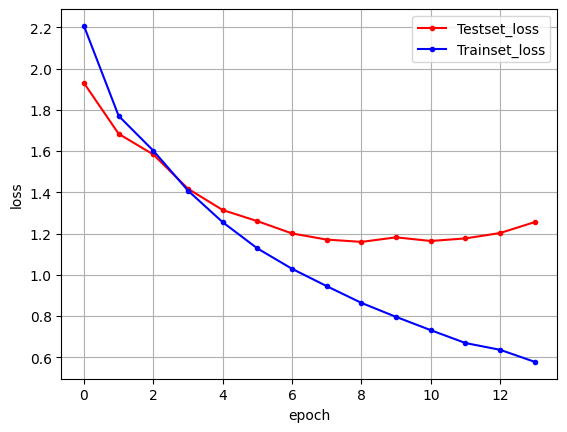

In [14]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프엥 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## LSTM과 CNN의 조합을 이용한 영화 리뷰 분류

In [15]:
from tensorflow.keras.datasets import imdb
# 긍정 부정을 찾는거라 원핫 인코딩 과정이 없음
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=5000)
xtrain = sequence.pad_sequences(xtrain, maxlen=500)
xtest = sequence.pad_sequences(xtest, maxlen=500)

17464789/17464789 [==============================] - 0s 0us/step


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
# Conv1D()함수는 Conv2D의 개념을 1차원으로 옮긴 것
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# MaxPooling1D(pool_size=4)은  1차원 배열에서 4개중에 가장 큰수를 넘기고 나머지를 버림
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                      

In [20]:
# 모델 실행 옵션 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [23]:
# 모델 실행
history = model.fit(xtrain, ytrain, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 81s 160ms/step - loss: 0.4223 - accuracy: 0.7870 - val_loss: 0.2701 - val_accuracy: 0.8893
Epoch 2/100
469/469 [==============================] - 37s 78ms/step - loss: 0.2355 - accuracy: 0.9108 - val_loss: 0.2757 - val_accuracy: 0.8827
Epoch 3/100
469/469 [==============================] - 19s 41ms/step - loss: 0.1833 - accuracy: 0.9315 - val_loss: 0.2632 - val_accuracy: 0.8890
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1502 - accuracy: 0.9451 - val_loss: 0.2982 - val_accuracy: 0.8861
Epoch 5/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1232 - accuracy: 0.9565 - val_loss: 0.2922 - val_accuracy: 0.8878
Epoch 6/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0907 - accuracy: 0.9691 - val_loss: 0.3360 - val_accuracy: 0.8894


In [24]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(xtest, ytest)[1]))

782/782 [==============================] - 3s 4ms/step - loss: 0.3692 - accuracy: 0.8778

 Test Accuracy : 0.8778


In [25]:
# 학습셋과 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

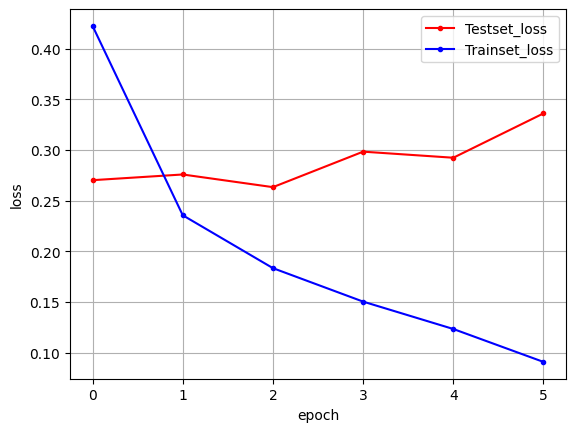

In [26]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 어텐션을 사용한 신경망

In [1]:
# 인코더와 디코더 사이에 층이 하나 생김
# 새로 삽입된 층에는 각 셀로부터 계산된 스코어들이 모임
# 이 스코어를 이용해 소프트맥스 함수를 사용해서 어텐션 가중치를 만듦
# 이 가중치를 이용해 입력 값중 어떤 셀을 중점적으로 볼지 결정
# 이러한 방식으로 매 출력마다 모든 입력 값을 두루 활용하게 하는 것
# 마지막 셀에 모든 입력값이 집중되던 RNN의 단점을 극복
!pip install attention

Epoch 1/100
625/625 [==============================] - 55s 85ms/step - loss: 0.3765 - accuracy: 0.8290 - val_loss: 0.2909 - val_accuracy: 0.8812
Epoch 2/100
625/625 [==============================] - 32s 50ms/step - loss: 0.2313 - accuracy: 0.9075 - val_loss: 0.2750 - val_accuracy: 0.8890
Epoch 3/100
625/625 [==============================] - 24s 38ms/step - loss: 0.1685 - accuracy: 0.9356 - val_loss: 0.2785 - val_accuracy: 0.8922
Epoch 4/100
625/625 [==============================] - 24s 38ms/step - loss: 0.1211 - accuracy: 0.9547 - val_loss: 0.3106 - val_accuracy: 0.8864
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 0.4249 - accuracy: 0.8801

 Test Accuracy : 0.8801


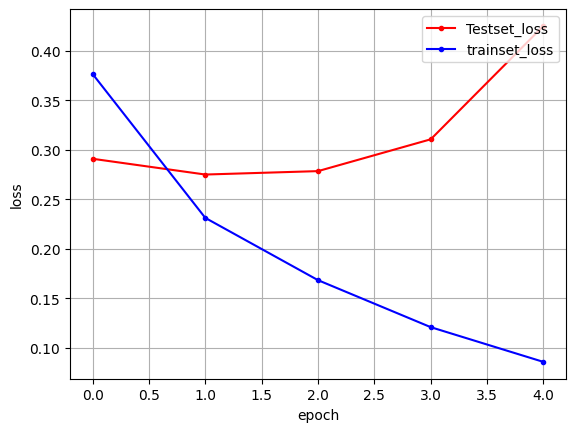

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from attention import Attention

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터를 불러와 학습셋 테스트셋 분리
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=5000)

# 단어 수 맞추기
xtrain = sequence.pad_sequences(xtrain, maxlen=500)
xtest = sequence.pad_sequences(xtest, maxlen=500)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
# Attention() 사용
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 3)

# 모델 실행
history = model.fit(xtrain, ytrain, batch_size=40, epochs=100, validation_data = (xtest, ytest), callbacks = [early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(xtest, ytest)[1]))

# 학습셋과 테스트셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="trainset_loss")

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
# 어텐션 없는 Test Accuracy : 0.8778
# 어텐션 사용 Test Accuracy : 0.8831
# 오니??